In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs) 

Text(0,0.5,'Magnitud')

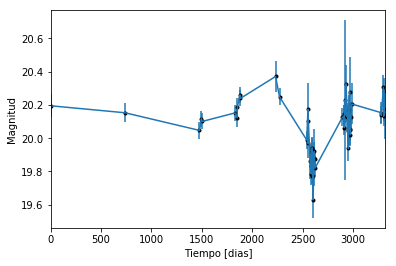

In [2]:
data = np.genfromtxt('LC_18822_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

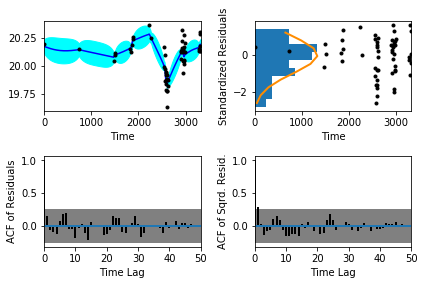

In [5]:
sample.assess_fit()

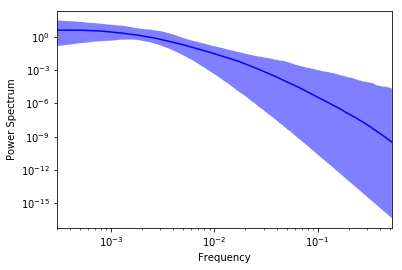

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.000376389,0.816837,'Medida del nivel de ruido')

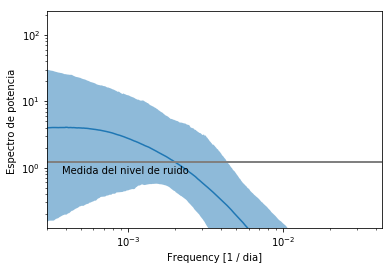

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))

Text(0.5,1,'Prediccion , valor esperado ')

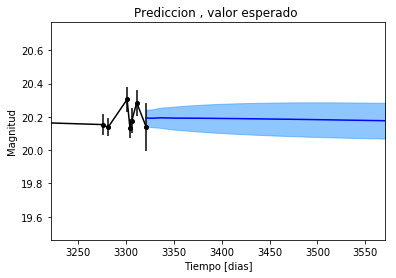

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado ')

Text(0.5,1,'Prediccion, Caminos simulados')

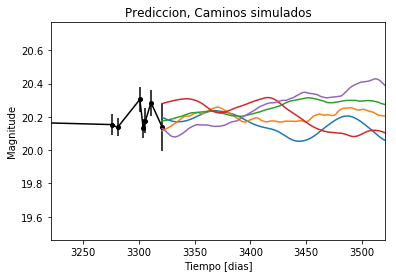

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


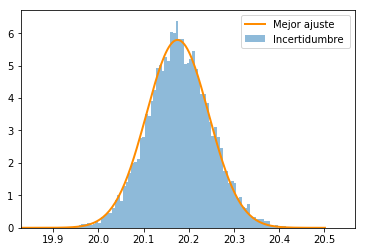

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')

Text(0.5,1,'Interpolacion, camino simulado')

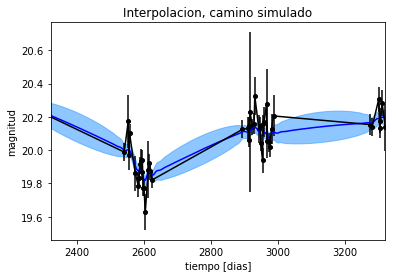

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

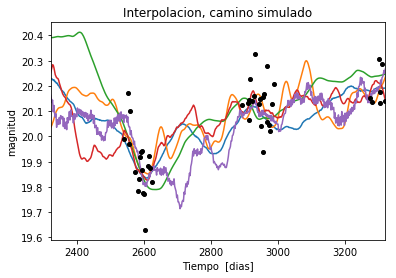

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 191.880202757
Median: 0.0136014020796
Standard deviation: 0.207891124947
68% credibility interval: [ 0.00097924  0.22457985]
95% credibility interval: [  3.63167890e-04   8.30092824e-01]
99% credibility interval: [  3.06861146e-04   9.97525917e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 210.876939049
Median: 0.00306582310432
Standard deviation: 0.110226225522
68% credibility interval: [ 0.00058413  0.04132934]
95% credibility interval: [ 0.00033818  0.33599159]
99% credibility interval: [  3.06791071e-04   8.63659595e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 690.45455498
Median: 0.0366706359477
Standard de

In [16]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 206.284462148
Median: 0.0184983140917
Standard deviation: 0.251061255979
68% credibility interval: [ 0.          0.39000202]
95% credibility interval: [ 0.          0.90984651]
99% credibility interval: [ 0.          1.02314486]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 206.284462148
Median: 0.0184983140917
Standard deviation: 0.251061255979
68% credibility interval: [ 0.          0.39000202]
95% credibility interval: [ 0.          0.90984651]
99% credibility interval: [ 0.          1.02314486]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1089.63193514
Median: 0.0
Standard deviation: 0.000970733159321
68% cr

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 734.986148986
Median: 78.3687388038
Standard deviation: 1.68850701869
68% credibility interval: [ 76.52531409  79.56806683]
95% credibility interval: [ 73.86885812  80.39509502]
99% credibility interval: [ 71.37862928  80.854807  ]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 883.003034471
Median: 0.842294394071
Standard deviation: 2.48038239508
68% credibility interval: [ 0.08974739  4.42440889]
95% credibility interval: [ 0.0205125   8.71656049]
99% credibility interval: [  0.01422179  12.02183281]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 264.911113881
Median: 0.757081936356
Standard deviation: 9.99666155384
68% credibility interval: [  0.0389768   10.93852905]
95% credibility interval: [  1.7382745

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 83737.9385324
Median: 2.22323277132e-45
Standard deviation: 5.29491987602e+101
68% credibility interval: [  2.17495526e-93   2.32620840e+11]
95% credibility interval: [  4.24838635e-175   6.63743286e+055]
99% credibility interval: [  5.52352963e-206   8.07927650e+098]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 3036.30153066
Median: 20.1326132545
Standard deviation: 0.0597506901646
68% credibility interval: [ 20.08565054  20.18396326]
95% credibility interval: [ 20.02162051  20.2590845 ]
99% credibility interval: [ 19.95090464  20.34652212]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 206.284462148
Median: 0.0184983140917
Standard deviation: 0.251061255979
68% credibility interval: [ 0.          0.39000202]
95% credibility interval: [ 0.          0.90984651]
99% credibility interval: [ 0.          1.02314486]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 206.284462148
Median: 0.0184983140917
Standard deviation: 0.251061255979
68% credibility interval: [ 0.          0.39000202]
95% credibility interval: [ 0.          0.90984651]
99% credibility interval: [ 0.          1.02314486]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1089.63193514
Median: 0.0
Standard deviation: 0.000970733159321
68% cr

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 734.986148986
Median: 78.3687388038
Standard deviation: 1.68850701869
68% credibility interval: [ 76.52531409  79.56806683]
95% credibility interval: [ 73.86885812  80.39509502]
99% credibility interval: [ 71.37862928  80.854807  ]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2336.58179874
Median: 0.017897556366
Standard deviation: 0.0217418085393
68% credibility interval: [ 0.01078638  0.03349345]
95% credibility interval: [ 0.00684995  0.06607095]
99% credibility interval: [ 0.00547536  0.1241435 ]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 794.485224888
Median: 1.06917056895
Standard deviation: 0.16723168244
68% credibility interval: [ 0.92273693  1.24396565]
95% credibility interval: [ 0.79881608  1.45417055]
99% credibility interval: [ 0.71747099  1.60864436]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 737.900155808
Median: 0.000255124386211
Standard deviation: 0.147731635807
68% credibility interval: [  5.20015642e-14   2.23903210e-02]
95% credibility interval: [  4.77631068e-59   3.16490829e-01]
99% credibility interval: [  7.73449199e-101   9.96217322e-001]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 191.880202757
Median: (-0.0854601297035+0j)
Standard deviation: 2.04807240756
68% credibility interval: [-1.41107679-2.11767852j -0.00615277-0.0044043j ]
95% credibility interval: [ -5.21562704e+00+0.j          -2.28185115e-03-0.02901851j]
99% credibility interval: [ -6.26764018e+00+0.j          -1.92806544e-03-0.00715271j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 210.876939049
Median: (-0.0192631346835+0.0855207251553j)
Standard deviation: 1.72280283719
68% credibility interval: [-0.25967990+0.31025033j -0.00367022+0.00310984j]
95% credibility interval: [-2.11109739 +5.60402248e+00j -0.00212483 +1.02668496e-04j]
99% credibility interval: [ -5.42653328e+00+2.5858002j  -1.92762515e-03+2.8989414j]
Posterior summar